# Leaky Integrate-and-Fire Neuron

The integrate-and-fire neuron was first envisioned by the French neuroscientist [Louis Lapicque](https://en.wikipedia.org/wiki/Louis_Lapicque) in 1907. Although the neuron theory was already stablished some years before, the nature of the action potentials was still unknown [[1]](#References). Therefore, the integrate-and-fire model tries the reproduce the electrical activity of a neuron, disregarding the mechanisms underlying it. In this notebook, we will deal with a modification of the this model: the leaky integrate-and-fire neuron. 

A neuron can be modeled as an RC circuit. The figure below shows the analogy between a neuron and a RC circuit. The main idea behind the model is the following: the cell membrane separates both the external and internal environment of a cell. The internal environment –named [cytosol](https://en.wikipedia.org/wiki/Cytosol)– is rich in negative charged molecules; the external environment is however, majoritarily compounded by positive charged molecules. Hence, the cell membrane that divides both environments functions as a insulator. If an external current $I$ is applied to the neuron, this will charge the membrane. This current can be understood as the entrance of positive ions towards the cytosol. Whenever the current is droped, the cell membrane will slowly return to its original charge. Therefore, the cell membrane acts similarly to a condensor. These properties allow the neuron to be represented as a RC circuit.

<p align="center">
    <img width="600" height="600" src="images/Integrate&Fire.pdf">
</p>

The cell membrane can be represented by a first order differential equation (ODE) [[2]](#References):  

<br/>
$$
\begin{equation}
I(t) = \frac{V(t) - V_R}{R} + C \frac{d V}{dt},
\end{equation}
$$
<br/>

where $V(t)$ is the internal potential over time, $V_R$ the resting membrane potential, $I(t)$ the injected current over time, $R$ the resistance of the membrane and $C$ its capacitance. We will assume that the current are is kept constant, $I$. Bearing this in mind, we can rearrange the equation:

<br/>
$$
\begin{equation}
\tau\frac{dV}{dt} = - (V(t) - V_R) + RI,
\end{equation}
$$
<br/>

where $\tau = RC$. This ODE can be solved by separation of variables for $V(t_0) = V_R$:

<br/>
$$
\begin{equation}
\int^{V(t)}_{V_R} \frac{1}{-(V-V_R)+RI} = \int^{t}_{0} \frac{1}{\tau}dt \\
\end{equation}
$$
<br/>
$$
\begin{equation}
-\Big [\log |-(V-V_R)+RI| \Big ]^{V(t)}_{V_R} = \frac{t}{\tau} \\
\end{equation}
$$
<br/>
$$
\begin{equation}
\log{\frac{-(V-V_R)+RI}{RI}} = \frac{t}{\tau} \\
\end{equation}
$$
<br/>
$$
\begin{equation}
\boxed{V(t) = V_R + RI(1 - e^{-\frac{t}{\tau}})}
\end{equation}
$$

Finally we have to introduce the firing. Whenever the potential of the cell reaches a given threshold $\theta$, a spike will be produced. Consequently, the potential of the cell will decrease back its resting potential. Mathematically, we can describe this behavior as a piecewise function:

<br/>
$$
V(t) = 
\begin{cases}
0, &\quad\text{if } V(t) > \theta \\
V(t) = V_R + RI(1 - e^{-\frac{t}{\tau}}), &\quad\text{otherwise}
\end{cases}
$$

Note that $t$ is also reseted after a spike is produced.

In [1]:
# Import the module with the leaky integrate-and-fire model
from NeuralModels import LeakyIntegrateAndFire

# Set the parameters and create the model
params = {
    "VR": -70,
    "R": 100,
    "C": 0.3,
    "I": 0.3,
    "theta": -55,
    "dt": 0.01,
    "t": 100
}
model = LeakyIntegrateAndFire(**params)

# This is equivalent to:
# model = LeakyIntegrateAndFire(VR=-70, I=0.2, R=100, C=0.1, dt=0.01, t=100, threshodl=-55)

# Run the model
model.run()

# Plot the results
model.plot()

ModuleNotFoundError: No module named 'NeuralModels'

The plot shows how the voltage of the cell changes as a function of time. The red dashed line corresponds to $\theta$. For $t = 0$, the neuron is at its resting potential. At $t>0$ the current is applied. The membrane potential increases until reaching the threshold. Afterward, the neuron spikes and its potential decreases back to $V_R$ (according to the equation above).

In addition, it will be interesting to compute the period and spiking frequency given a constant intensity. Analitically, it will be the time when $V(t) = \theta$:

<br/>
$$
\theta = V_R + RI(1 - e^{-\frac{T}{\tau}}),
$$
<br/>

where $T$ is the spiking period. By isolating $T$:  

<br/>
$$
T = - \tau \log{\Big |1 - \frac{\theta - V_R}{RI} \Big|}
$$
<br/>

The frequency is by definition:  

<br/>
$$
f = \frac{1}{T}
$$
<br/>


The model calculates the period and frequency when defining the parameters of the model. By printing the model we can access to this information:

In [2]:
print(model)

LeakyIntegrateAndFire(VR=-70, R=100, C=0.3, tau=30.0, I=0.3, theta=-55, dt=0.01, t=100, T=20.794, f=0.048)


For the example above, the period $T = 20.784$ implies the neuron fires approximately each 21ms. If we want to observe a determined number of $N$ spikes, we can calculate the time of simulation needed as follows:  
  
<br/>
$$
t = NT = \frac{N}{f}
$$
<br/>

For example, if we want to observe $N = 10$ spikes, we have to run the simulation for approximately 208 ms:

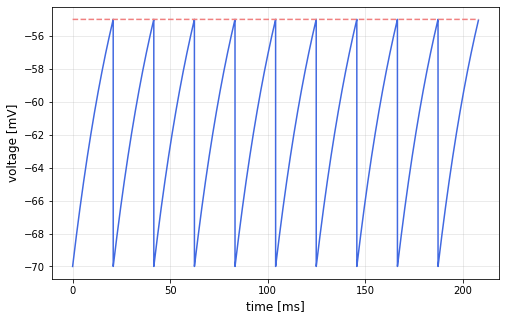

In [3]:
# Change the parameter time
model.t = 208

# Run and plot the model
model.run()
model.plot()

# References
1. [Lapicque's introduction of the integrate-and-fire model neuron](https://web.archive.org/web/20070613230629/http://neurotheory.columbia.edu/~larry/AbbottBrResBul99.pdf)
2. [Neuronal Dynamics: Chapter 1](https://neuronaldynamics.epfl.ch/book.html)